In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Еще раз загружаем датасет со всеми атрибутами
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
y = iris.target_names[y]  # Присвоили значения ['setosa', 'versicolor', 'virginica'] для значений [0, 1, 2]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Разделили выборку на X_train, X_test, y_train, y_test

In [4]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Пронормировали признаки

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # Обучили с помощью классификатора kNN

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_score = knn.predict_proba(X_test)  # Предсказали для тестовой выборки
y_score

array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.66666667, 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.

In [8]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)  # Провели бинаризацию каждого класса целевой переменной
y_onehot_test.shape  # (n_samples, n_classes)

(45, 3)

In [9]:
label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [10]:
# ROC кривая для одного класса Iris virginica:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

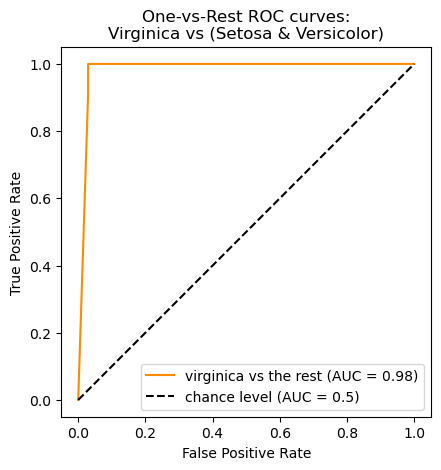

In [11]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_onehot_test[:, class_id], y_score[:, class_id],
                                 name=f"{class_of_interest} vs the rest", color="darkorange",)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()